In [23]:
import styletranfer
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


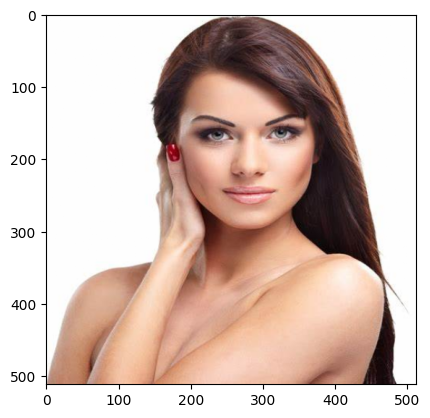

In [61]:
image = Image.open('makeup\OIP.jpg')
image = image.resize((512, 512), Image.BILINEAR)
image = np.array(image, dtype=np.float32)
image /= 255
plt.imshow(image)
plt.show()

[ 0  1  3  5 10 12 13 14 17]


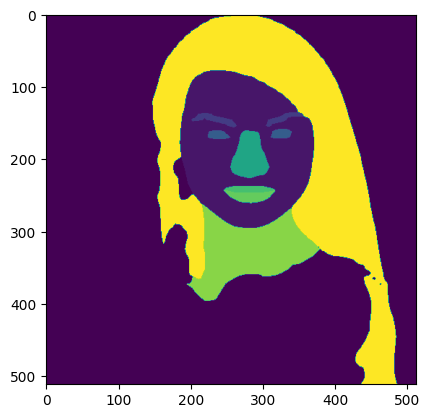

In [48]:
import Segmentation as seg
mask = seg.getMask('makeup\OIP.jpg',r'res\cp\79999_iter.pth')
plt.imshow(mask)


# Style


e:\miniconda3\envs\AI\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
e:\miniconda3\envs\AI\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Building the style transfer model..
Optimizing..


c:\Users\franz\OneDrive\Documentos\GitHub\face-parsing.PyTorch\styletranfer.py:92: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
c:\Users\franz\OneDrive\Documentos\GitHub\face-parsing.PyTorch\styletranfer.py:93: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


run [50]:
Style Loss : 109.319633 Content Loss: 13.062795

run [100]:
Style Loss : 26.054447 Content Loss: 14.472239

run [150]:
Style Loss : 6.678457 Content Loss: 14.111601

run [200]:
Style Loss : 3.415665 Content Loss: 12.897533

run [250]:
Style Loss : 2.387555 Content Loss: 11.869627

run [300]:
Style Loss : 1.865885 Content Loss: 11.201546



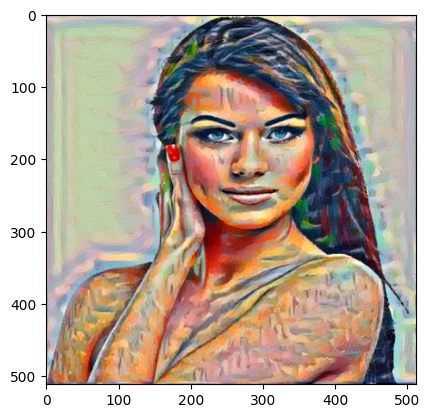

In [45]:
style = styletranfer.run("makeup\style.jpg","makeup\OIP.jpg")
style = style[0].cpu().detach().numpy().transpose(1,2,0)
plt.imshow(style)

In [69]:
def applyStyleToClass(image,style,mask,classnum):    
    styletest =style.copy()
    masktest = mask.copy()
    masktest = np.repeat(masktest[:, :, np.newaxis], 3, axis=2)
    image2 = np.where(masktest==classnum,styletest,image)
    plt.imshow(image2)
    plt.show()
    return image2


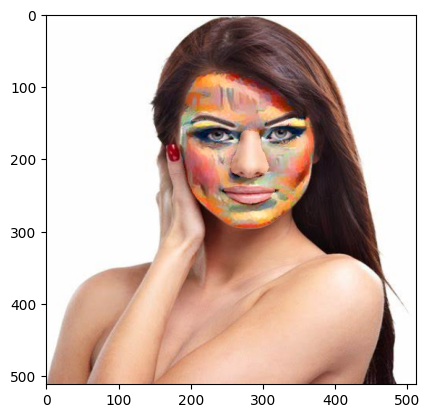

array([[[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       [[0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843],
        [0.99607843, 0.99607843, 0.99607843]],

       ...,

       [[0.84313726, 0.75686276, 0.7254902 ],
        [0.8039216 , 0.7137255 , 0.6745098 ],
        [0.7254902 , 0

In [73]:
applyStyleToClass(image,style,mask,1)

In [57]:
styletest.shape

(512, 512, 3)

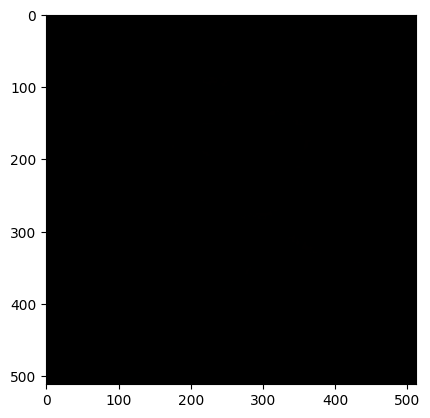

In [44]:
plt.imshow(style.astype(np.uint8))